<a href="https://colab.research.google.com/github/visiont3lab/deep-learning-course/blob/main/colab/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents

* How to read, transform and plot images (pillow library)
* Image Generator desin for large dataset
* Convolution - Max Pooling (Padding, Stride)
* Convolutional Neural Network

Materials
* [Computer vision using Pytorch](https://www.mygreatlearning.com/blog/computer-vision-using-pytorch/)
* [Convolutional Neural Network Lenet](https://colab.research.google.com/github/d2l-ai/d2l-pytorch-colab/blob/master/chapter_convolutional-neural-networks/lenet.ipynb)
* [Data Loader](https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel)
* [Pytorch Cifar](https://colab.research.google.com/drive/1B5KQvPySqYEa6XicRHdOwgv8fN1BrCgQ)

## Setup

In [1]:
!rm -rf data/ arcolinux-wallpapers/

In [2]:
# Download test wallpaper images
!git clone https://github.com/arcolinux/arcolinux-wallpapers.git
!mkdir -p data/
!mv arcolinux-wallpapers/usr/share/backgrounds/arcolinux data/
!mv data/arcolinux data/backgrounds

Cloning into 'arcolinux-wallpapers'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 217 (delta 8), reused 20 (delta 5), pack-reused 193
Receiving objects: 100% (217/217), 112.87 MiB | 38.96 MiB/s, done.
Resolving deltas: 100% (53/53), done.


## Image Dataset

### Pillow Read Image

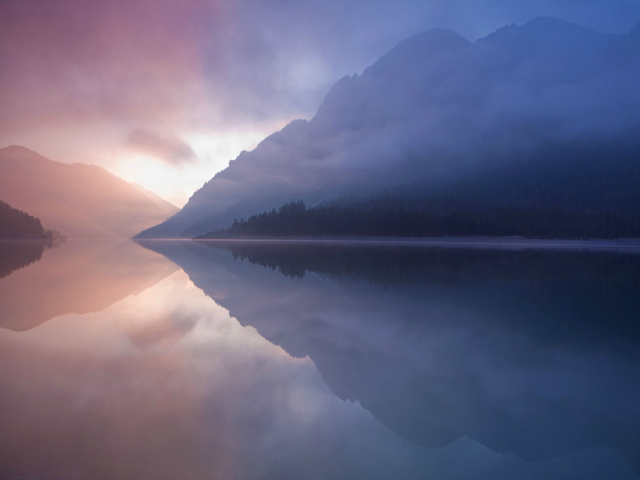

In [3]:
# Read images using pillow library
from PIL import Image
import os
import numpy as np

folder_path = "data/backgrounds"
names = os.listdir(folder_path) 
filepaths = [os.path.join(folder_path,name) for name in names]

def read_image(filepaths):
    idx = np.random.randint(0, len(names))
    filepath = filepaths[idx]
    im_pil = Image.open(filepath)
    im_pil = im_pil.resize((640,480))
    #print(f"Image Size: {im.size}")
    im_arr = np.array(im_pil,dtype=np.uint8)
    #print(im_arr)
    #im_pil = Image.fromarray(im_arr)
    return im_pil, im_arr

im_pil, im_arr = read_image(filepaths)
display(im_pil)

### [Pytorch Transformation](https://pytorch.org/vision/stable/transforms.html)

In [4]:
# Pytorch grid of images
import torchvision
from torchvision import transforms
from PIL import Image
import os
import numpy as np

folder_path = "data/backgrounds"
names = os.listdir(folder_path) 
filepaths = [os.path.join(folder_path,name) for name in names]

# Pytorch tansform https://pytorch.org/vision/stable/transforms.html
toT = transforms.ToTensor()  # Convert pil image to tensor and scale in range 0 - 1 !
toPIL = transforms.ToPILImage()

# Read a random image
im_pil , im_arr = read_image(filepaths)

# Convert Pil image to tensor
im_t1 = toT(im_pil)
#im_t1 = transforms.ToTensor()(im_pil)
print(im_t1.shape)
print(im_t1[:,0:5,0:5])
# Convert Numpy array Image to tensor
im_t2 = toT(toPIL(im_arr))
#im_t2 = transforms.ToTensor()( transforms.ToPILImage()(im_arr) )
#print(im_t2.shape)

torch.Size([3, 480, 640])
tensor([[[0.0706, 0.0902, 0.0863, 0.0824, 0.0941],
         [0.2196, 0.1059, 0.0902, 0.0941, 0.0941],
         [0.4863, 0.1451, 0.0902, 0.0941, 0.0941],
         [0.0471, 0.0784, 0.0980, 0.0941, 0.0941],
         [0.0941, 0.0941, 0.0941, 0.0902, 0.0902]],

        [[0.0000, 0.0078, 0.0157, 0.0157, 0.0118],
         [0.1294, 0.0275, 0.0118, 0.0118, 0.0118],
         [0.3098, 0.0549, 0.0078, 0.0118, 0.0118],
         [0.0000, 0.0078, 0.0118, 0.0118, 0.0118],
         [0.0078, 0.0118, 0.0118, 0.0118, 0.0118]],

        [[0.0157, 0.0314, 0.0392, 0.0353, 0.0314],
         [0.1451, 0.0471, 0.0314, 0.0353, 0.0314],
         [0.3333, 0.0784, 0.0275, 0.0314, 0.0314],
         [0.0039, 0.0275, 0.0314, 0.0314, 0.0314],
         [0.0275, 0.0353, 0.0314, 0.0314, 0.0314]]])


### Image Batch from scratch 

(-0.5, 3874.5, 489.5, -0.5)

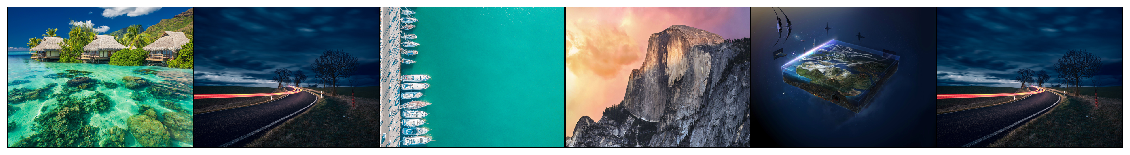

In [5]:
import torch
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow

# Show multiple images inside a grid
images = []
for i in range(0,6):
    im_pil , im_arr = read_image(filepaths)
    images.append(im_arr)
images_arr  = np.array(images,dtype=np.float32) / 255.0
#images_arr = np.moveaxis(images_arr,3,1)
images_arr = np.transpose(images_arr, (0,3,1,2))
#print(images_arr.shape)
images_t = torch.tensor(images_arr,dtype=torch.float32)
batch_grid =torchvision.utils.make_grid(images_t, nrow=6, padding=5)
batch_grid = batch_grid.permute(1,2,0)
fig = plt.figure(figsize=(20,10))
plt.imshow(batch_grid, interpolation="nearest") #,aspect='auto')
plt.axis('off')

### Creation of a Custom Image Dataset for loading large amount of images

torch.Size([10, 3, 480, 640])
torch.Size([3, 975, 3230])


(-0.5, 3229.5, 974.5, -0.5)

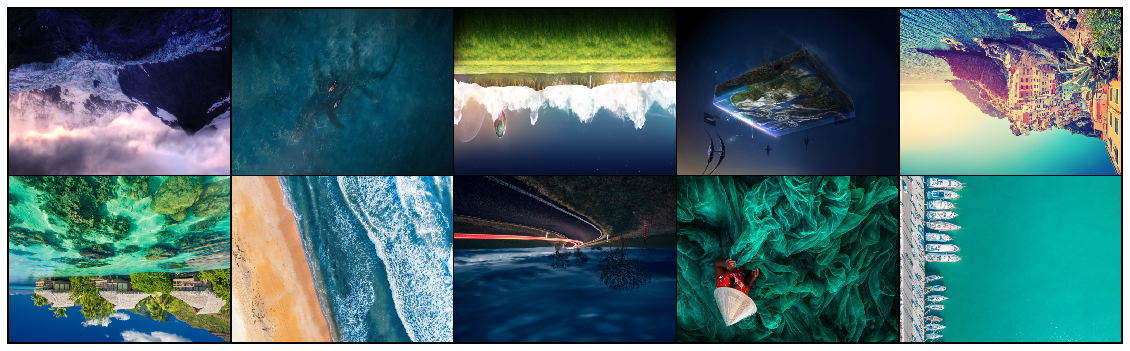

In [6]:
from torchvision import datasets
from torch.utils.data import DataLoader,Dataset
import torch
import matplotlib.pyplot as plt 

folder_path = "data/backgrounds"
class ImageDataset(Dataset):
    def __init__(self, folder_path,transform=None):
        names = os.listdir(folder_path) 
        self.filepaths = [os.path.join(folder_path,name) for name in names]
        self.transform = transform
    def __getitem__(self, index):
        filepath = self.filepaths[index]
        x = Image.open(filepath)
        if self.transform:
            x =self.transform(x)
        return x
    def __len__(self):
        return len(self.filepaths)

#  Compose Transformation applied to an Image
data_transform = transforms.Compose([
                                    #transforms.ToPILImage(),  # Tensor of Numpy array to Pillow
                                    #transforms.RandomHorizontalFlip(p=1), # Pillow transformation
                                    transforms.Resize((480,640)), # H,W
                                    transforms.RandomVerticalFlip(p=1), # Pillow transformation
                                    transforms.ToTensor(),          # Pillow to tensor
                            ])   
                   
data = ImageDataset(folder_path,data_transform)
dataloader = torch.utils.data.DataLoader(data,batch_size=10,shuffle=True)
images_t = next(iter(dataloader))
print(images_t.shape) # B x C x H x W

# nrows number of images in a row
batch_grid =torchvision.utils.make_grid(images_t, nrow=5, padding=5)
print(batch_grid.shape)
batch_grid = batch_grid.permute(1,2,0)
fig = plt.figure(figsize=(20,10))
plt.imshow(batch_grid, interpolation="nearest") #,aspect='auto')
plt.axis('off')

## Pytorch Convolutions

### Convolution applied to an array

In [7]:
from torch import nn
import numpy as np

im = np.array([
                [ 10,  11,   9,   3 ],
                [  2,  123,  4,   0 ] ,
                [ 45,  237, 23,  99 ],
                [ 20,  67,  22, 255 ],
            ])

filter = np.array( [
                    [1,0],
                    [1,0],
                    #[0,1],
                ])

# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

im = torch.tensor(im).type(torch.float32).unsqueeze(0).unsqueeze(0)
print(im.shape)
conv = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=(2 ,2), stride=(2, 2), padding=(0,0),bias=False) # height wight
print("\n--- Weights")
print(conv.weight)
print("\n-- Bias")
print(conv.bias)
y = conv.forward(im)
print("\n-- Output")
print(y)

torch.Size([1, 1, 4, 4])

--- Weights
Parameter containing:
tensor([[[[0.2529, 0.4619],
          [0.3954, 0.1048]]]], requires_grad=True)

-- Bias
None

-- Output
tensor([[[[ 21.2864,   5.2431],
          [135.7694,  86.9551]]]], grad_fn=<ThnnConv2DBackward>)


### Convolution applied to image

In [8]:
# Pick an image form the dataset loader
imgs = next(iter(dataloader))

Image Shape: torch.Size([1, 1, 480, 640])

Weights shape: torch.Size([1, 1, 2, 2]) 
Parameter containing:
tensor([[[[-0.2671, -0.4263],
          [ 0.2405,  0.0252]]]], requires_grad=True)


Weights shape: torch.Size([1, 1, 2, 2]) 
Parameter containing:
tensor([[[[1.0000, 0.0000],
          [0.0000, 0.1000]]]], requires_grad=True)



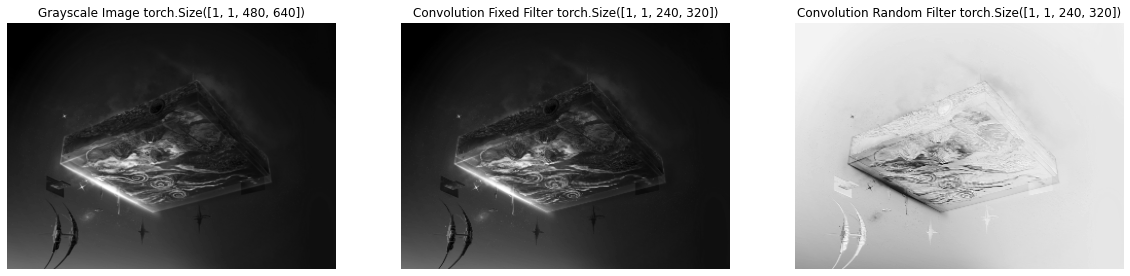

In [9]:
# Select first image
im = imgs[0]
im = transforms.Grayscale()(im)

im = im.type(torch.float32).unsqueeze(0)
print(f"Image Shape: {im.shape}")
conv = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=(2 ,2), stride=(2, 2), padding=(0,0),bias=False) # height wight
print(f"\nWeights shape: {conv.weight.shape} \n{conv.weight}\n")
#print(f"\nBias shape: {conv.bias.shape} \n{conv.bias}\n")
with torch.no_grad():
    filter = torch.from_numpy( np.array( [[[1,0],[0,0.1]]]) ).type(torch.float32).unsqueeze(0)
    im_conv_rand = conv.forward(im)
    conv.weight = nn.Parameter(filter)
    print(f"\nWeights shape: {conv.weight.shape} \n{conv.weight}\n")
    im_conv = conv.forward(im)

# Plot
fig=plt.figure(figsize=(20, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(im[0,0,:,:],cmap="gray")
plt.title(f"Grayscale Image {im.shape}")
plt.axis("off")
fig.add_subplot(1, 3, 2)
plt.imshow(im_conv[0,0,:,:],cmap="gray")
plt.title(f"Convolution Fixed Filter {im_conv.shape}")
plt.axis("off")
fig.add_subplot(1, 3, 3)
plt.imshow(im_conv_rand[0,0,:,:],cmap="gray")
plt.title(f"Convolution Random Filter {im_conv.shape}")
plt.axis("off")
plt.show()

###  Convolution Layer: Convolution + Relu + Pooling

In [10]:
# Pick an image form the dataset loader
imgs = next(iter(dataloader))
print(imgs.shape)

torch.Size([10, 3, 480, 640])


In [11]:
# pad should be smaller than or equal to half of kernel size, but got padW = 2, padH = 2, kW = 3, kH = 3
def plot(outs):
    # nrows number of images in a row
    y = outs[1].unsqueeze(1)
    #print(y.shape)
    batch_grid =torchvision.utils.make_grid(y, nrow=8, padding=5,keep_channels=True).permute(1, 2, 0)
    #print(batch_grid.shape)
    fig = plt.figure(figsize=(20,10))
    plt.imshow(batch_grid, interpolation="nearest") #,aspect='auto')
    plt.axis('off')

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16, kernel_size=3, stride=2, padding=1,bias=False) 
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32, kernel_size=9, stride=2, padding=4,bias=False) 
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1) 
        self.fc1 = nn.Linear(38400,3)
        print("Params")
        for param in self.parameters():
            print(f"Params:  {param.shape}")
    def features(self,x):
        # Feature extractor
        conv1 = self.conv1(x)
        relu1 = torch.relu(conv1)
        pool1 = self.pool1(relu1)
        print(f"Conv1 shape: {conv1.shape}")
        print(f"MaxPool1 shape: {pool1.shape}")
        conv2 = self.conv2(pool1)
        relu2 = torch.relu(conv2)
        pool2 = self.pool2(relu2)
        print(f"Conv2 shape: {conv2.shape}")
        print(f"MaxPool2 shape: {pool2.shape}")
        return pool2    
    def classifier(self,x):
        # Classifier
        x = torch.flatten(x,1)
        y = torch.log_softmax(self.fc1(x),dim=-1)
        print(f"Output shape: {y.shape}")
        return y
    def forward(self, x):
        x = self.features(x)
        plot(x)
        x = self.classifier(x)
        return x

Params
Params:  torch.Size([16, 3, 3, 3])
Params:  torch.Size([32, 16, 9, 9])
Params:  torch.Size([3, 38400])
Params:  torch.Size([3])
Conv1 shape: torch.Size([10, 16, 240, 320])
MaxPool1 shape: torch.Size([10, 16, 120, 160])
Conv2 shape: torch.Size([10, 32, 60, 80])
MaxPool2 shape: torch.Size([10, 32, 30, 40])
Output shape: torch.Size([10, 3])
tensor([[-1.0943, -1.1160, -1.0858],
        [-1.1866, -1.1236, -0.9952],
        [-1.1111, -1.1048, -1.0801],
        [-1.1027, -1.0964, -1.0967],
        [-1.1225, -1.1331, -1.0427],
        [-1.1084, -1.1373, -1.0520],
        [-1.1111, -1.1048, -1.0801],
        [-1.1219, -1.1087, -1.0661],
        [-1.1687, -1.1027, -1.0293],
        [-1.1326, -1.0868, -1.0773]], grad_fn=<LogSoftmaxBackward>)


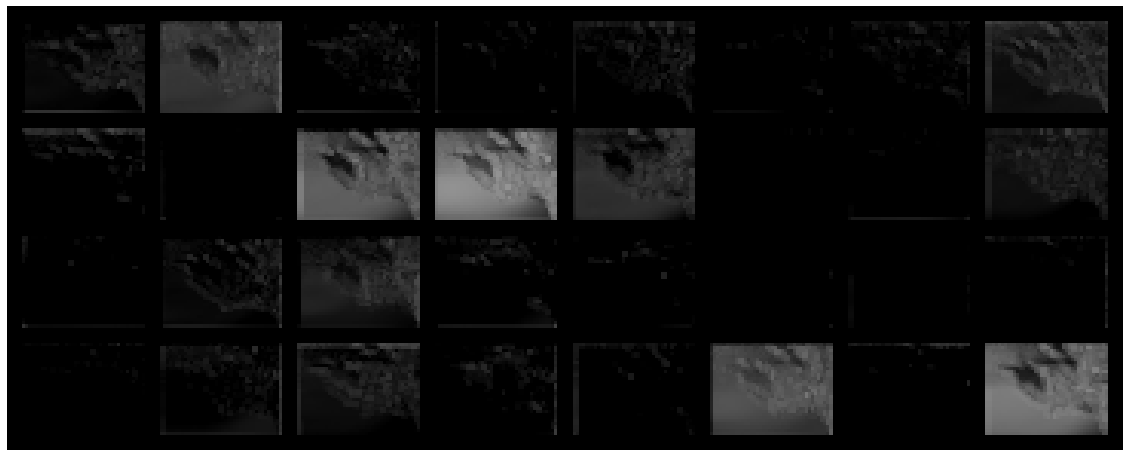

In [12]:
model = ConvNet()
y = model.forward(imgs)
print(y)

## Numpy Convolutions

In [13]:
im = np.array([
                [ 10,  11,   9,   3 ],
                [  2,  123,  4,   0 ] ,
                [ 45,  237, 23,  99 ],
                [ 20,  67,  22, 255 ],
            ])

filter = np.array( [
                    [1,0],
                    [1,0],
                    #[0,1],
                ])


### Convolution 2D

In [14]:
# Numpy element wise multiplication
#np.sum(np.multiply(im_small,filter))
imw = im.shape[1]
imh = im.shape[0]
fw = filter.shape[1]
fh = filter.shape[0]
stride = 2
conv = []
for j in range(0,imh,fh):
    for i in range(0,imw,stride):
        block = im[j:(j+fh),i:(i+fw)]
        val = np.sum(np.multiply(block,filter))
        conv.append(val)
        #print(block)
    #break
conv = np.array(conv).reshape( ( (int)(imh/stride),(int)(imw/stride) ) )
conv

array([[12, 13],
       [65, 45]])

### Max Pooling 2D

In [15]:
imw = im.shape[1]
imh = im.shape[0]
fw = filter.shape[1]
fh = filter.shape[0]
stride = 2
pool = []
for j in range(0,imh,fh):
    for i in range(0,imw,stride):
        block = im[j:(j+fh),i:(i+fw)]
        val = np.max(block)
        pool.append(val)
        #print(block)
    #break
pool = np.array(pool).reshape( ( (int)(imh/stride),(int)(imw/stride) ) )
pool

array([[123,   9],
       [237, 255]])

### Padding

In [16]:
padding =1
imp = np.pad(im,pad_width=padding)
imp # 5x5

array([[  0,   0,   0,   0,   0,   0],
       [  0,  10,  11,   9,   3,   0],
       [  0,   2, 123,   4,   0,   0],
       [  0,  45, 237,  23,  99,   0],
       [  0,  20,  67,  22, 255,   0],
       [  0,   0,   0,   0,   0,   0]])

In [17]:
imw = imp.shape[1]
imh = imp.shape[0]
fw = filter.shape[1]
fh = filter.shape[0]
stride = 2
conv = []
for j in range(0,imh,fh):
    for i in range(0,imw,stride):
        block = imp[j:(j+fh),i:(i+fw)]
        val = np.sum(np.multiply(block,filter))
        conv.append(val)
        #print(block)
    #break
s = (int)(len(conv)/2)
#print(conv)
conv = np.array(conv).reshape( ( (int)(imh/stride),(int)(imw/stride) ) )
conv

array([[  0,  11,   3],
       [  0, 360,  99],
       [  0,  67, 255]])